## Libraries ##

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.compose
import sklearn.neighbors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.linear_model
import numpy as np
import sklearn.tree
import warnings
warnings.filterwarnings('ignore')

## Dataset loading ##

In [ ]:
book_df = pd.read_csv('/content/drive/MyDrive/ML_Dataset/all_books_data.csv')

In [ ]:
book_df

,Name,Author,User Rating,Reviews,Price,Year,Genre,category_name
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17.00,2009,Non Fiction,NaN
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5.00,2009,Non Fiction,NaN
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13.00,2009,Fiction,NaN
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14.00,2009,Non Fiction,NaN
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4.00,2009,Fiction,NaN
...,...,...,...,...,...,...,...,...
133797,Anna Karenina,Leo Tolstoy,4.7,0,0.00,2023-09-15 00:00:00.000,NaN,Nonfiction
133798,Scary Smart: Scary Smart: The Future of Artifi...,Mo Gawdat,4.4,0,9.99,2021-09-30 00:00:00.000,NaN,Nonfiction
133799,The Count of Monte Cristo: The Original Unabri...,Alexandre Dumas,4.8,0,1.99,2023-09-15 00:00:00.000,NaN,Nonfiction
133800,War And Peace,Leo Tolstoy,4.7,0,0.00,2023-08-25 00:00:00.000,NaN,Nonfiction


# Data splitting ##

In [ ]:
df = book_df.copy()

In [ ]:
X = df[['User Rating','Reviews','Genre']]
y = df['Price']
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.2,random_state=42)

In [ ]:
print(f'Size of the dataset : {df.shape}')
print(f'size of X_train : {X_train.shape}')
print(f'size of X_test : {X_test.shape}')

Size of the dataset : (133802, 8)
size of X_train : (107041, 3)
size of X_test : (26761, 3)


# Data Exploration #

In [ ]:
df.dtypes

Name              object
Author            object
User Rating      float64
Reviews            int64
Price            float64
Year              object
Genre             object
category_name     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133802 entries, 0 to 133801
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Name           133802 non-null  object 
 1   Author         133377 non-null  object 
 2   User Rating    133802 non-null  float64
 3   Reviews        133802 non-null  int64  
 4   Price          133802 non-null  float64
 5   Year           84783 non-null   object 
 6   Genre          700 non-null     object 
 7   category_name  133102 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 8.2+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,133802.0,4.405324,0.744055,0.0,4.40,4.50,4.70,5.0
Reviews,133802.0,983.469066,5531.024151,0.0,0.00,5.00,380.00,618227.0
Price,133802.0,15.121393,22.208954,0.0,4.99,9.99,14.99,682.0


In [ ]:
df.isna().sum()

Name                  0
Author              425
User Rating           0
Reviews               0
Price                 0
Year              49019
Genre            133102
category_name       700
dtype: int64

In [ ]:
df.duplicated().sum()

2

In [ ]:
df.drop_duplicates(subset= 'Name', keep = False, inplace = True)

## Explanatory Data Analysis ##

### Distribution of books by rating ###

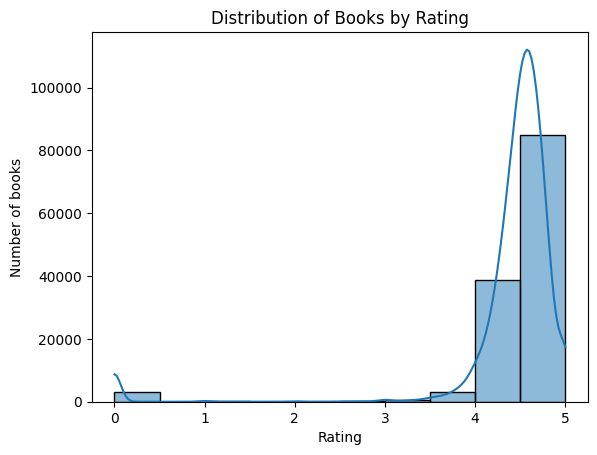

In [ ]:
sns.histplot(df['User Rating'], bins=10, kde=True)
plt.title('Distribution of Books by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of books')
plt.show()

### Most reviewed books ###

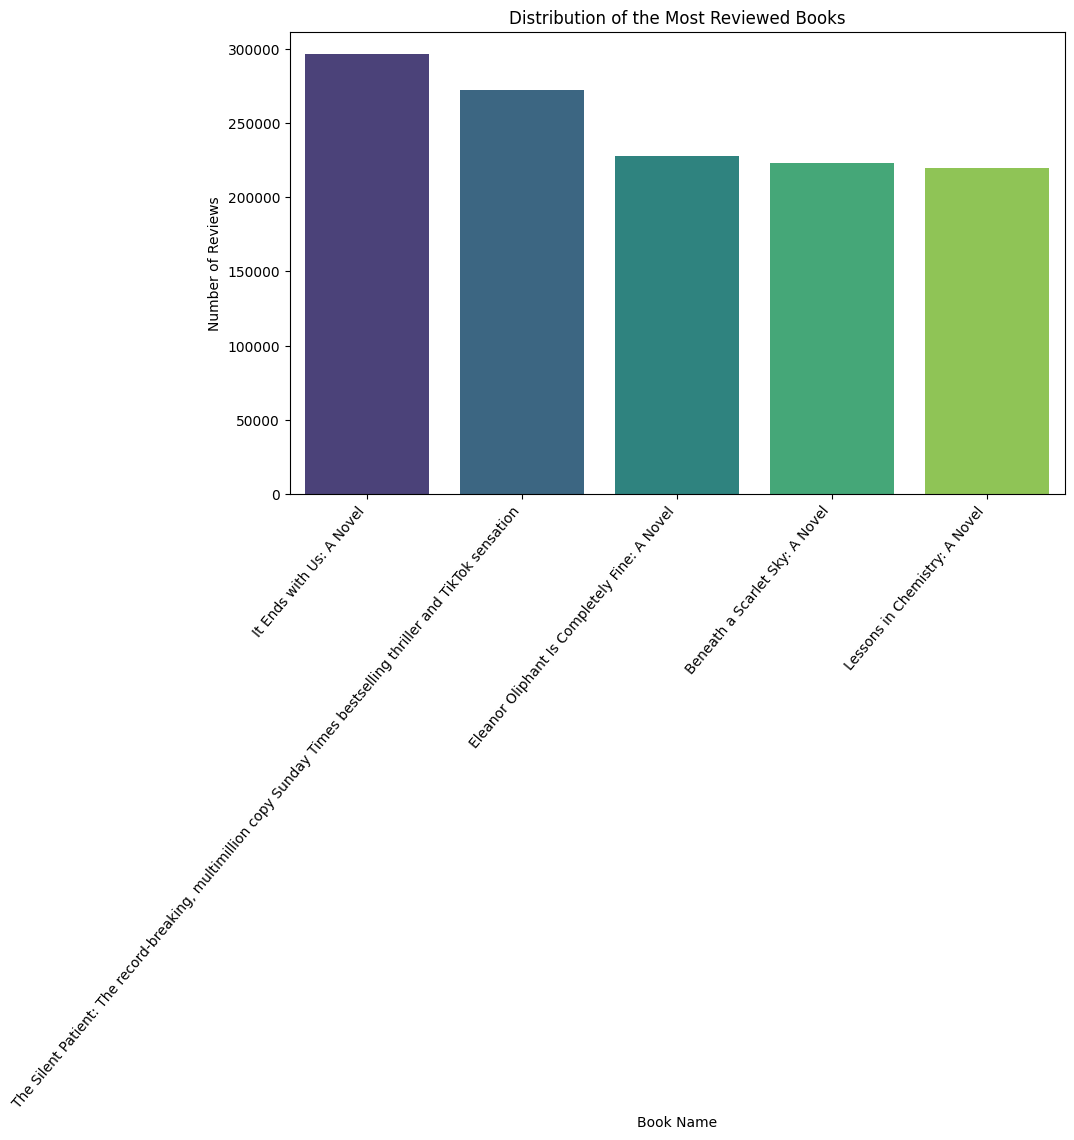

In [ ]:
df_sorted = df.sort_values(by='Reviews', ascending=False)
top_books = df_sorted.head()

# Plotting the distribution of the most reviewed books
plt.figure(figsize=(10, 6))
sns.barplot(data=top_books, x='Name', y='Reviews', palette='viridis')
plt.title('Distribution of the Most Reviewed Books')
plt.xlabel('Book Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

### List of the different books ###

In [ ]:
df['Name'].unique().tolist()

['Arguing with Idiots: How to Stop Small Minds and Big Government',
 'Breaking Dawn (The Twilight Saga, Book 4)',
 'Dead And Gone: A Sookie Stackhouse Novel (Sookie Stackhouse/True Blood)',
 'Diary of a Wimpy Kid: The Last Straw (Book 3)',
 'Divine Soul Mind Body Healing and Transmission System: The Divine Way to Heal You, Humanity, Mother Earth, and All…',
 'Dog Days (Diary of a Wimpy Kid, Book 4) (Volume 4)',
 'Eat This Not That! Supermarket Survival Guide: The No-Diet Weight Loss Solution',
 'Eat This, Not That! Thousands of Simple Food Swaps that Can Save You 10, 20, 30 Pounds--or More!',
 'Eclipse (Twilight Sagas)',
 'Eclipse (Twilight)',
 "Glenn Beck's Common Sense: The Case Against an Out-of-Control Government, Inspired by Thomas Paine",
 'Going Rogue: An American Life',
 'Liberty and Tyranny: A Conservative Manifesto',
 'Mastering the Art of French Cooking, Vol. 2',
 'New Moon (The Twilight Saga)',
 'Olive Kitteridge',
 'Sookie Stackhouse',
 'Super Freakonomics: Global Cooling,

### General information about the most rating book ###

In [ ]:
most_reviewed_book = df.sort_values(by='Reviews', ascending=False).iloc[0]

print("Most Reviewed Book:")
print(most_reviewed_book[['Name', 'Author','Genre', 'Price', 'User Rating', 'Reviews']])

Most Reviewed Book:
Name           It Ends with Us: A Novel
Author                   Colleen Hoover
Genre                               NaN
Price                             11.99
User Rating                         4.7
Reviews                          296710
Name: 29328, dtype: object


In [ ]:
category_counts = df['category_name'].value_counts()
category_counts.count()

31

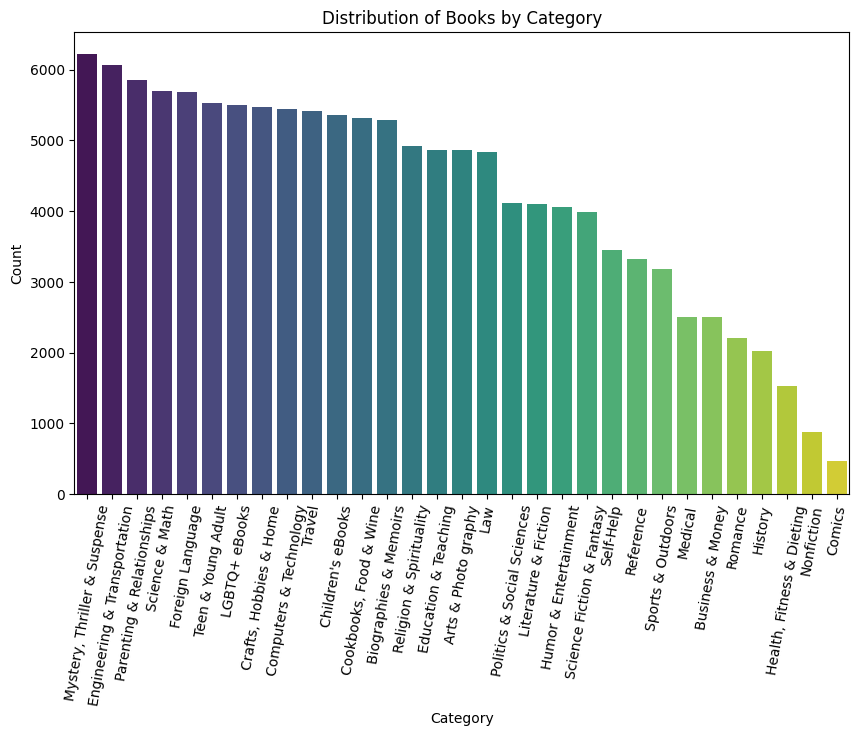

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Books by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

# Data Preprocessing #

In [ ]:
# create a function to transform or convert the year into date before extrating it
date_formats = ['%Y-%m-%d %H:%M:%S.%f', '%Y']
# Function to parse dates with multiple formats
def try_parsing_date(text):
    for fmt in date_formats:
        try:
            return pd.to_datetime(text, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT (Not a Time) if none of the formats match

# Apply the function to the 'dates' column
df['Date'] = df['Year'].apply(try_parsing_date)

In [ ]:
# drop the year column
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,category_name,Date
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5.00,2009,Non Fiction,NaN,2009-01-01
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13.00,2009,Fiction,NaN,2009-01-01
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4.00,2009,Fiction,NaN,2009-01-01
5,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15.00,2009,Fiction,NaN,2009-01-01
6,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6.00,2009,Non Fiction,NaN,2009-01-01
...,...,...,...,...,...,...,...,...,...
133793,The Dream: The Extraordinary Revelation Of Who...,David Icke,4.5,0,7.99,2023-09-01 00:00:00.000,NaN,Nonfiction,2023-09-01
133795,THE EYES OF DARKNESS,Dean Koontz,4.4,0,9.99,2022-03-05 00:00:00.000,NaN,Nonfiction,2022-03-05
133797,Anna Karenina,Leo Tolstoy,4.7,0,0.00,2023-09-15 00:00:00.000,NaN,Nonfiction,2023-09-15
133798,Scary Smart: Scary Smart: The Future of Artifi...,Mo Gawdat,4.4,0,9.99,2021-09-30 00:00:00.000,NaN,Nonfiction,2021-09-30


In [ ]:
#extract the year from the date
extract = pd.DatetimeIndex(df['Date'])
df['Year'] = extract.year
df['Year'] = df['Year'].astype(str).str.extract(r'(\d+)')

In [ ]:
# Drop the date column
df.drop('Date', axis=1, inplace=True)

In [ ]:
# replace the null column by some data
df['category_name'].fillna('Unknown', inplace = True)
df['Genre'].fillna('Unknown', inplace = True)
df['Author'].fillna('Unknown', inplace = True)
df['Year'].fillna(df['Year'].median, inplace = True)

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,category_name
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5.0,2009,Non Fiction,Unknown
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13.0,2009,Fiction,Unknown
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4.0,2009,Fiction,Unknown
5,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15.0,2009,Fiction,Unknown
6,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6.0,2009,Non Fiction,Unknown
